# Data Preparation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing as preproc
from scipy import stats
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold,train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from imblearn.under_sampling import ClusterCentroids
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_parquet("diabetic_data_cleaned_pca_som_diag_grouped_ae_dbscan.parquet")
# df2=pd.read_parquet("diabetic_data_cleaned_pca_som_ae.parquet")
# print(df.shape)
# print(df2.shape)

In [ ]:
df=pd.read_csv("diabetic_data_cleaned_pca_som_diag_grouped_ae_dbscan.csv")

In [ ]:
df.head()

,Unnamed: 0,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,ae_4,ae_5,ae_6,ae_7,ae_8,ae_9,ae_10,ae_11,ae_12,ae_13
0,0,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,...,8.584562,20.436142,5.291698,8.157053,17.783960,23.949799,11.668662,8.264934,22.667690,27.363850
1,1,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,...,15.110230,15.245245,33.812020,2.966186,29.897364,28.222050,23.203943,12.367907,29.435223,36.155518
2,2,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,...,1.598465,25.428694,8.711449,21.261776,11.921114,30.430517,22.689114,7.689127,13.135617,25.826536
3,3,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,...,13.074265,8.245643,12.659610,19.848545,6.032684,29.801752,10.818433,3.274082,20.075940,10.891075
4,4,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,...,31.112360,17.769810,11.906863,35.779766,28.849283,11.464336,28.415997,17.790482,19.180480,26.632393


In [ ]:
df.columns

Index(['Unnamed: 0', 'encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'insulin', 'glyburide-metformin',
       'change', 'diabetesMed', 'readmitted', 'PC1', 'PC2', 'PC3',
       'som_jaccard_0', 'som_jaccard_1', 'som_euc_0', 'som_euc_1',
       'diag_1_group', 'diag_2_group', 'diag_3_group', 'ae_0', 'ae_1', 'ae_2',
       'ae_3', 'ae_4', 'ae_5', 'ae_6', 'ae_7', 'ae_8', 'ae_9', 'ae_10',
       'ae_11', 'ae_12', 'ae_13'],
      dtype='object')

In [ ]:
df['som_jaccard_1']

0        7
1        2
2        7
3        2
4        2
        ..
99061    7
99062    1
99063    7
99064    6
99065    7
Name: som_jaccard_1, Length: 99066, dtype: int64

In [ ]:
print(df[df['readmitted']=='NO'].shape)
print(df[df['readmitted']=='>30'].shape)
print(df[df['readmitted']=='<30'].shape)

(53212, 56)
(34744, 56)
(11110, 56)


In [ ]:
df_3_levels=df.copy()

In [ ]:
df_2_levels=df.copy()
df_2_levels['readmitted'] = df_2_levels['readmitted'].replace('NO', '>30')

In [ ]:
print(df['readmitted'].unique())
print(df_2_levels['readmitted'].unique())
print(df_3_levels['readmitted'].unique())

['>30' 'NO' '<30']
['>30' '<30']
['>30' 'NO' '<30']


In [ ]:
#df=df_downsampled
df=df_2_levels.copy()

In [ ]:
print(df_2_levels[df_2_levels['readmitted']=='NO'].shape)
print(df_2_levels[df_2_levels['readmitted']=='>30'].shape)
print(df_2_levels[df_2_levels['readmitted']=='<30'].shape)

(0, 56)
(87956, 56)
(11110, 56)


In [ ]:
y=df['readmitted']

In [ ]:
# Assuming 'y' contains your target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
y_encoded

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
column1=[
  'PC1','PC2', 'PC3',
  'ae_0', 'ae_1', 'ae_2', 'ae_3', 'ae_4',
  'ae_5', 'ae_6', 'ae_7', 'ae_8', 'ae_9',
  'ae_10', 'ae_11', 'ae_12', 'ae_13'
]
# column1=[
#   'PC1','PC2', 'PC3'
# ]
df[column1].head()

,PC1,PC2,PC3,ae_0,ae_1,ae_2,ae_3,ae_4,ae_5,ae_6,ae_7,ae_8,ae_9,ae_10,ae_11,ae_12,ae_13
0,-0.214843,0.070744,-0.194516,21.509342,19.395063,13.789462,18.633125,8.584562,20.436142,5.291698,8.157053,17.783960,23.949799,11.668662,8.264934,22.667690,27.363850
1,0.417941,-0.522845,0.160733,35.920300,9.260715,18.687860,9.814375,15.110230,15.245245,33.812020,2.966186,29.897364,28.222050,23.203943,12.367907,29.435223,36.155518
2,-0.129162,-0.131116,-0.050765,25.516636,20.602080,21.286129,11.283273,1.598465,25.428694,8.711449,21.261776,11.921114,30.430517,22.689114,7.689127,13.135617,25.826536
3,-0.333245,-0.143083,-0.009183,15.020832,18.029790,14.233169,6.268053,13.074265,8.245643,12.659610,19.848545,6.032684,29.801752,10.818433,3.274082,20.075940,10.891075
4,0.640729,-0.446888,-0.059434,17.637230,34.109043,10.788097,20.966002,31.112360,17.769810,11.906863,35.779766,28.849283,11.464336,28.415997,17.790482,19.180480,26.632393


In [ ]:
X=df[column1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.05, random_state=42,stratify=y_encoded)

In [ ]:
X_train.head()

,PC1,PC2,PC3,ae_0,ae_1,ae_2,ae_3,ae_4,ae_5,ae_6,ae_7,ae_8,ae_9,ae_10,ae_11,ae_12,ae_13
56304,-0.135392,0.219827,-0.014254,11.937053,10.344141,12.743904,17.809916,13.642877,14.758603,11.587162,0.661430,21.130703,10.003657,16.497656,6.763138,18.706690,9.281048
59671,-0.279387,-0.049701,0.077432,41.008137,31.004086,34.365158,9.192533,18.099903,12.497881,25.175997,25.324010,20.498121,31.234362,26.270160,8.165574,21.445776,44.987500
47502,0.428219,0.206119,0.042075,28.963541,26.910599,32.958466,18.588760,26.273165,42.709705,27.257940,17.530832,20.377047,13.035508,16.937752,10.960556,13.615743,38.836940
57832,0.598126,-0.183436,0.104474,26.044228,22.130466,37.328770,14.635577,46.959854,20.519026,32.715000,24.514730,16.783281,11.198268,31.353205,26.231524,35.080130,12.223691
8714,0.163516,-0.284876,0.152006,10.145803,28.947886,23.591768,22.143667,22.476340,31.610037,21.270702,18.629862,24.076578,25.932072,8.849765,11.657608,17.114416,8.206092


In [ ]:
df_train=X_train.copy()

In [ ]:
df_train['readmitted']=y_train

In [ ]:
# # Identify the minority class
# minority_class = df['readmitted'].value_counts().idxmin()
# print(minority_class)
# # Calculate the number of samples in the minority class
# minority_count = df['readmitted'].value_counts().min()
# print(minority_count)
minority_class = df_train['readmitted'].value_counts().idxmin()
print(minority_class)
# Calculate the number of samples in the minority class
minority_count = df_train['readmitted'].value_counts().min()
print(minority_count)

0
10554


In [ ]:
# # Sample the majority class to have the same number of samples as the minority class
majority_class = df_train[df_train['readmitted'] != minority_class]
majority_downsampled = resample(majority_class,
                                 replace=False,    # sample without replacement
                                 n_samples=minority_count,    # to match minority class
                                 random_state=42)  # reproducible results

# Combine the minority class and the downsampled majority class
df_downsampled = pd.concat([majority_downsampled, df_train[df_train['readmitted'] == minority_class]])

In [ ]:
df_downsampled.shape

(21108, 18)

In [ ]:
X_train=df_downsampled[column1]
y_train=df_downsampled['readmitted']

In [ ]:
df=df_3_levels

In [ ]:
print(df_downsampled[df_downsampled['readmitted']=='NO'].shape)
print(df_downsampled[df_downsampled['readmitted']=='>30'].shape)
print(df_downsampled[df_downsampled['readmitted']=='<30'].shape)

(0, 56)
(11110, 56)
(11110, 56)


In [ ]:
column1=[
  'PC1','PC2', 'PC3',
  'ae_0', 'ae_1', 'ae_2', 'ae_3', 'ae_4',
  'ae_5', 'ae_6', 'ae_7', 'ae_8', 'ae_9',
  'ae_10', 'ae_11', 'ae_12', 'ae_13'
]
# column1=[
#   'PC1','PC2', 'PC3'
# ]
df[column1].head()

,PC1,PC2,PC3,ae_0,ae_1,ae_2,ae_3,ae_4,ae_5,ae_6,ae_7,ae_8,ae_9,ae_10,ae_11,ae_12,ae_13
0,-0.214843,0.070744,-0.194516,21.509342,19.395063,13.789462,18.633125,8.584562,20.436142,5.291698,8.157053,17.783960,23.949799,11.668662,8.264934,22.667690,27.363850
1,0.417941,-0.522845,0.160733,35.920300,9.260715,18.687860,9.814375,15.110230,15.245245,33.812020,2.966186,29.897364,28.222050,23.203943,12.367907,29.435223,36.155518
2,-0.129162,-0.131116,-0.050765,25.516636,20.602080,21.286129,11.283273,1.598465,25.428694,8.711449,21.261776,11.921114,30.430517,22.689114,7.689127,13.135617,25.826536
3,-0.333245,-0.143083,-0.009183,15.020832,18.029790,14.233169,6.268053,13.074265,8.245643,12.659610,19.848545,6.032684,29.801752,10.818433,3.274082,20.075940,10.891075
4,0.640729,-0.446888,-0.059434,17.637230,34.109043,10.788097,20.966002,31.112360,17.769810,11.906863,35.779766,28.849283,11.464336,28.415997,17.790482,19.180480,26.632393


In [ ]:
X=df[column1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.05, random_state=42,stratify=y_encoded)

In [ ]:
scaler = preproc.MinMaxScaler()
X_scaled=scaler.fit_transform(X_train)

In [ ]:

cc = ClusterCentroids(random_state=42)
X_resampled, y_resampled = cc.fit_resample(X_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X_resampled.shape

(21108, 17)

In [ ]:
column2=[
  'PC1','PC2', 'PC3',
  'ae_0', 'ae_1', 'ae_2', 'ae_3', 'ae_4',
  'ae_5', 'ae_6', 'ae_7', 'ae_8', 'ae_9',
  'ae_10'
]
df2[column2].head()

,PC1,PC2,PC3,ae_0,ae_1,ae_2,ae_3,ae_4,ae_5,ae_6,ae_7,ae_8,ae_9,ae_10
0,-0.214843,0.070744,-0.194516,22.876373,10.852900,15.065039,31.019421,27.719538,25.533045,7.944871,20.922789,27.010193,11.216609,20.678316
1,0.417941,-0.522845,0.160733,13.269567,18.226522,17.166298,23.886705,33.430027,47.993740,8.140186,39.252544,27.722694,7.005354,28.845524
2,-0.129162,-0.131116,-0.050765,21.936855,13.771294,19.349968,48.049038,31.504131,22.436737,6.229624,17.802269,19.045977,23.747458,44.441738
3,-0.333245,-0.143083,-0.009183,23.144642,8.532896,23.532095,22.429426,19.974939,25.424990,18.631826,11.400923,9.645898,21.622543,35.477718
4,0.640729,-0.446888,-0.059434,15.655556,11.166486,17.973852,21.544680,26.190376,11.214865,20.167032,30.240730,11.272454,58.370567,21.489260


# Machine Learning Methods

              precision    recall  f1-score   support

           0       0.14      0.60      0.23       556
           1       0.92      0.55      0.69      4398

    accuracy                           0.56      4954
   macro avg       0.53      0.58      0.46      4954
weighted avg       0.83      0.56      0.64      4954



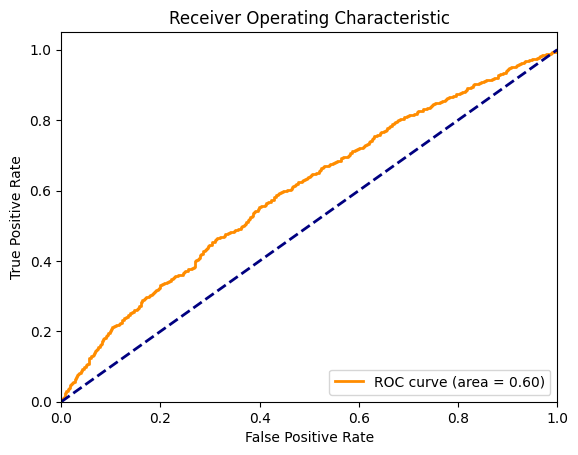

In [ ]:


# Step 3: Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42,stratify=y_resampled)

# Step 4: Scale features
scaler = preproc.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#print(X_train_scaled.shape)

# Step 5: Train the SVM model
svm_model = SVC(kernel='linear', C=0.2)
svm_model.fit(X_train_scaled, y_train)

# Step 6: Evaluate model performance
y_pred = svm_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Calculate probabilities
y_probs = svm_model.decision_function(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# # Step 3: Initialize SVM models with different kernels
# svm_linear = SVC(kernel='linear')
# svm_poly = SVC(kernel='poly', degree=3)  # You can adjust the degree parameter as needed
# svm_rbf = SVC(kernel='rbf', gamma='scale')  # 'scale' automatically sets gamma to 1 / (n_features * X.var())
# svm_sigmoid = SVC(kernel='sigmoid')

# # Step 4: Train and evaluate SVM models with different kernels
# for svm_model, kernel_name in zip([svm_linear, svm_poly, svm_rbf, svm_sigmoid], ['Linear', 'Polynomial', 'RBF', 'Sigmoid']):
#     svm_model.fit(X_train_scaled, y_train)
#     y_pred = svm_model.predict(X_test_scaled)
#     print(f"Classification Report for {kernel_name} kernel:")
#     print(classification_report(y_test, y_pred))

In [ ]:
X_train_scaled.shape

(21108, 17)

In [ ]:
# Step 6: Evaluate model performance
y_pred = svm_model.predict(X_train_scaled)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.60      0.58     10554
           1       0.57      0.54      0.56     10554

    accuracy                           0.57     21108
   macro avg       0.57      0.57      0.57     21108
weighted avg       0.57      0.57      0.57     21108



In [ ]:
# Step 2: Initialize SVM model
#svm_model = SVC(kernel='linear', C=1.0)  # You can adjust kernel and C parameter as needed
svm_poly = SVC(kernel='poly', degree=3)

# # Step 4: Scale features
# scaler = preproc.MinMaxScaler()
# X_resampled_scaled=scaler.fit_transform(X_resampled)

# Step 3: Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Adjust the number of folds as needed
cv_scores = cross_val_score(svm_poly, X_resampled, y_resampled, cv=kf, scoring='f1')

# Step 4: Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

# You can also perform additional evaluation using classification report on the entire dataset
# svm_model.fit(X_scaled, y)
# y_pred = svm_model.predict(X_scaled)
# print("Classification Report:")
# print(classification_report(y, y_pred))

Cross-validation scores: [0.91674167 0.91471647 0.91651665 0.91831683 0.9140414 ]
Mean accuracy: 0.9160666066606661


In [ ]:
# Step 3: Split data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42,stratify=y_resampled)

# Step 4: Scale features
# scaler = preproc.MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#print(X_train_scaled.shape)

# Step 5: Train the SVM model
svm_model = SVC(kernel='linear', C=1)
#svm_model = SVC(kernel='poly', degree=3)
svm_model.fit(X_resampled, y_resampled)

# Step 6: Evaluate model performance
y_pred = svm_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.12      0.69      0.21       556
           1       0.91      0.39      0.54      4398

    accuracy                           0.42      4954
   macro avg       0.52      0.54      0.38      4954
weighted avg       0.82      0.42      0.51      4954



In [ ]:
y_pred = svm_model.predict(X_resampled)
print(classification_report(y_resampled, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.72      0.64     10554
           1       0.63      0.48      0.54     10554

    accuracy                           0.60     21108
   macro avg       0.60      0.60      0.59     21108
weighted avg       0.60      0.60      0.59     21108



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# Define a pipeline with normalization and model
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('svm', SVC(kernel='poly', degree=3))
])

# Perform cross-validation using the pipeline
cv_scores = cross_val_score(pipeline, X_resampled, y_resampled, cv=5, scoring='f1')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())